In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import math

%matplotlib inline

In [2]:
def get_data(token):
    
    if token == 'FLOW':
        exchange = 'kraken'
    else :
        exchange = 'coinbase-pro'

    res = requests.get(
        f'https://api.cryptowat.ch/markets/{exchange}/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )
    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [3]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

In [4]:
df = pd.concat(get_data(token) for token in tokens)
df['chain'] = np.where(df.token.isin(['ETH', 'AAVE', 'COMP']), np.full(df.shape[0], 'ETH'), df.token)
df.set_index('ts', inplace=True)

In [5]:
len(df)

3195

In [6]:
df.groupby('chain')['volumeUSD'].sum().to_frame()

,volumeUSD
chain,
AVAX,4.298046e+09
ETH,2.454277e+10
FLOW,9.578277e+07
SOL,8.035478e+09
USDT,2.219253e+09


In [7]:
df.sort_values('volume')

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-11-24 01:00:00,4341.5800,4343.6200,4340.9200,4343.5900,4.669108e+01,2.027631e+05,ETH,ETH
2021-12-15 10:00:00,8.6000,8.6000,8.5740,8.5830,7.442690e+01,6.389397e+02,FLOW,FLOW
2021-12-12 13:00:00,9.1200,9.1290,9.1130,9.1130,9.189193e+01,8.382021e+02,FLOW,FLOW
2021-12-01 05:00:00,12.5420,12.5570,12.5130,12.5130,1.008080e+02,1.262889e+03,FLOW,FLOW
2021-11-27 19:00:00,11.9310,11.9350,11.9190,11.9190,1.459268e+02,1.741454e+03,FLOW,FLOW
...,...,...,...,...,...,...,...,...
2021-12-06 04:00:00,1.0013,1.0014,1.0011,1.0011,1.655653e+07,1.657648e+07,USDT,USDT
2021-12-04 15:00:00,1.0014,1.0061,1.0011,1.0025,2.121106e+07,2.125089e+07,USDT,USDT
2021-12-04 16:00:00,1.0025,1.0111,1.0014,1.0015,2.153120e+07,2.157394e+07,USDT,USDT


In [8]:
df_mutations = df

In [9]:
df_mutations['close price ratio'] =  df['close'][df.token=='ETH'] / df['close'][df.token=='SOL']

In [10]:
df_mutations

,open,high,low,close,volume,volumeUSD,token,chain,close price ratio
ts,,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
2021-12-18 10:00:00,8.482,8.493,8.452,8.457,3269.252641,2.771097e+04,FLOW,FLOW,22.034751
2021-12-18 11:00:00,8.507,8.596,8.499,8.571,6116.680853,5.233419e+04,FLOW,FLOW,21.978787
2021-12-18 12:00:00,8.566,8.573,8.504,8.504,7007.318033,5.971052e+04,FLOW,FLOW,21.988949


In [15]:
df_mutations.rename(
    columns={
        'volume':'volumeBase',
        'volumeUSD':'volumeTerm'
    }
)

,open,high,low,close,volumeBase,volumeTerm,token,chain,close price ratio
ts,,,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH,ETH,18.471694
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH,ETH,18.736150
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH,ETH,18.577985
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH,ETH,18.794937
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH,ETH,18.891059
...,...,...,...,...,...,...,...,...,...
2021-12-18 10:00:00,8.482,8.493,8.452,8.457,3269.252641,2.771097e+04,FLOW,FLOW,22.034751
2021-12-18 11:00:00,8.507,8.596,8.499,8.571,6116.680853,5.233419e+04,FLOW,FLOW,21.978787
2021-12-18 12:00:00,8.566,8.573,8.504,8.504,7007.318033,5.971052e+04,FLOW,FLOW,21.988949


In [16]:
df_5 = pd.concat((df['close'][df.token==token].rename(f'{token}') for token in tokens), axis=1)

In [17]:
df_5

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-12-18 10:00:00,3944.00,178.990,113.90,1.0003,8.457
2021-12-18 11:00:00,3978.60,181.020,115.40,1.0002,8.571
2021-12-18 12:00:00,3959.55,180.070,116.07,1.0003,8.504


In [18]:
df_hour = np.log(df_5/df_5.shift(1)).dropna()

In [19]:
df_hour 

,ETH,SOL,AVAX,USDT,FLOW
ts,,,,,
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
2021-11-22 05:00:00,-0.002472,-0.015161,-0.031832,-0.0001,-0.014014
...,...,...,...,...,...
2021-12-18 10:00:00,0.012379,0.009205,0.004223,-0.0001,-0.000591
2021-12-18 11:00:00,0.008735,0.011278,0.013083,-0.0001,0.013390
2021-12-18 12:00:00,-0.004800,-0.005262,0.005789,0.0001,-0.007848


In [20]:
df_corresction = df_hour.corr()

In [21]:
df_corresction

,ETH,SOL,AVAX,USDT,FLOW
ETH,1.000000,0.756472,0.655985,-0.089958,0.582583
SOL,0.756472,1.000000,0.648521,0.108889,0.475991
AVAX,0.655985,0.648521,1.000000,0.012933,0.404414
USDT,-0.089958,0.108889,0.012933,1.000000,-0.177123
FLOW,0.582583,0.475991,0.404414,-0.177123,1.000000


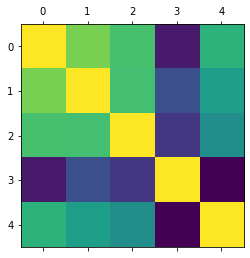

In [22]:
plt.matshow(df_corresction)